In [21]:
library(dslabs)
library(tidyverse)
library(cluster)

In [4]:
head(gapminder)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
2,Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
3,Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
4,Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
5,Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
6,Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


In [44]:
df_2010 <- gapminder %>% filter(year==2010) %>% mutate(gdp_pc=gdp/population) %>% drop_na() %>% select(-year)

In [45]:
model_standarized<- df_2010 %>% caret::preProcess(method=c('center','scale'))
model_standarized

Created from 173 samples and 9 variables

Pre-processing:
  - centered (6)
  - ignored (3)
  - scaled (6)


In [46]:
model_standarized %>% predict(df_2010) -> df_2010_st

In [47]:

cl <- kmeans(df_2010_st[,c("infant_mortality","life_expectancy","fertility","gdp_pc")], 4)
ss <- silhouette(cl$cluster, dist(df_2010_st[,c("infant_mortality","life_expectancy","fertility","gdp_pc")]))

In [48]:
mean(ss[,"sil_width"])

[1] 0.4055091

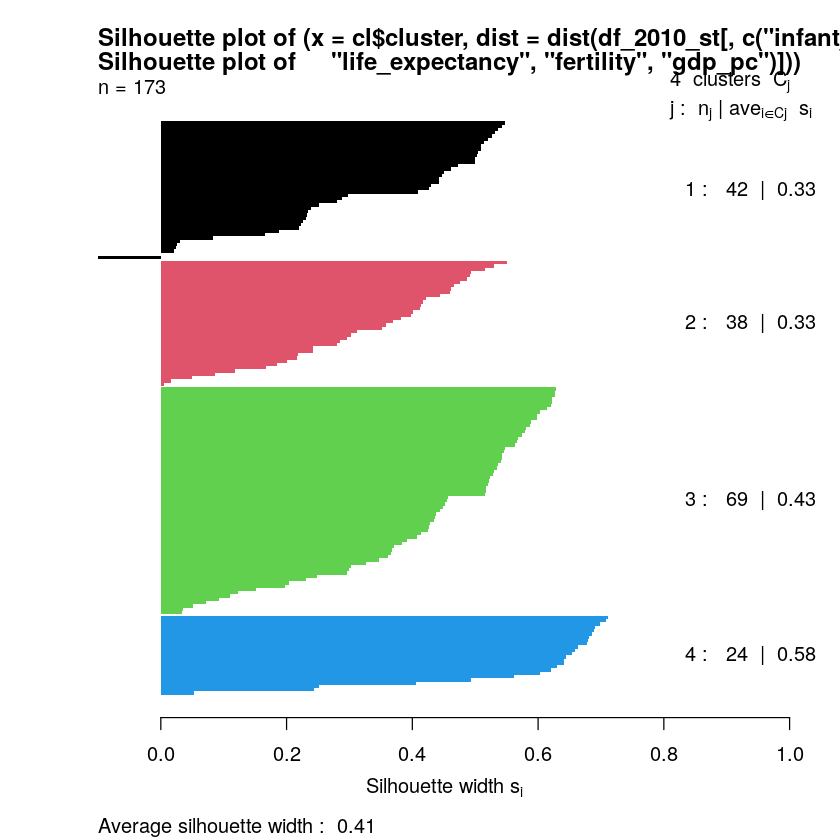

In [49]:
plot(ss, col=1:4, border=NA)

**Intentamos ver el número de grupos**

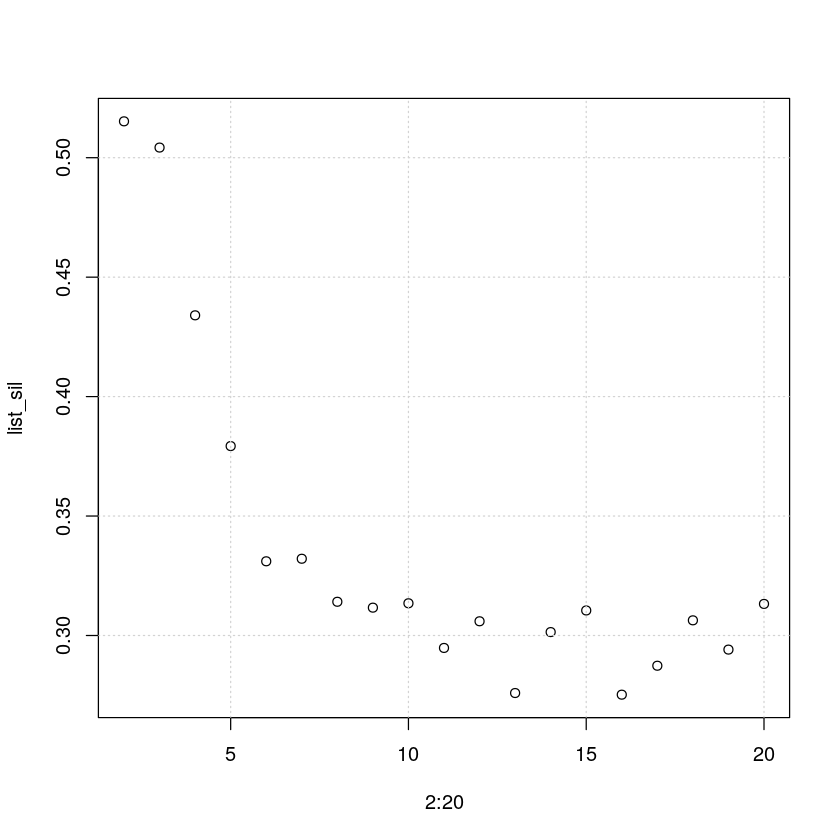

In [51]:
list_sil<-c()
for (k in 2:20){
    cl <- kmeans(df_2010_st[,c("infant_mortality","life_expectancy","fertility","gdp_pc")], k)
    ss <- silhouette(cl$cluster, dist(df_2010_st[,c("infant_mortality","life_expectancy","fertility","gdp_pc")]))
    list_sil <- c(list_sil, mean(ss[,"sil_width"]))
}
plot(2:20,list_sil)
grid()

Nos quedamos con 2 clusteres al tener mayor silhouette

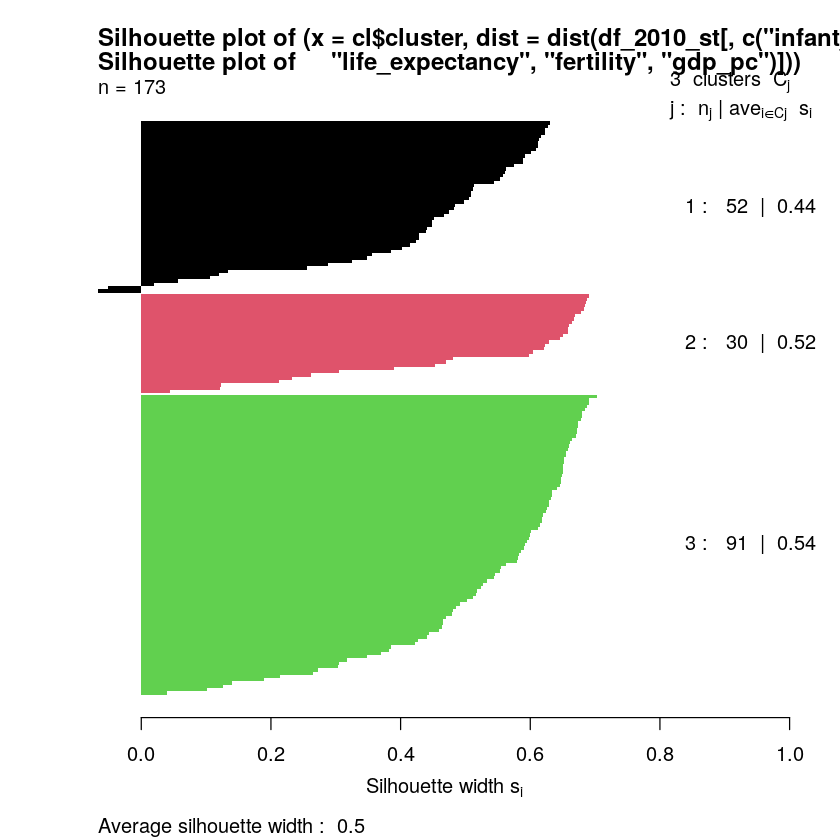

In [53]:
k=3
cl <- kmeans(df_2010_st[,c("infant_mortality","life_expectancy","fertility","gdp_pc")], 3)
ss <- silhouette(cl$cluster, dist(df_2010_st[,c("infant_mortality","life_expectancy","fertility","gdp_pc")]))

plot(ss, col=1:3, border=NA)

In [55]:
df_2010$cl <- as.factor(cl$cluster)
df_2010 %>% filter(cl==1) %>% summary()

         country   infant_mortality life_expectancy   fertility    
 Angola      : 1   Min.   : 26.60   Min.   :32.20   Min.   :2.470  
 Benin       : 1   1st Qu.: 44.48   1st Qu.:56.40   1st Qu.:4.170  
 Botswana    : 1   Median : 58.25   Median :60.25   Median :4.915  
 Burkina Faso: 1   Mean   : 60.67   Mean   :59.35   Mean   :4.837  
 Burundi     : 1   3rd Qu.: 72.28   3rd Qu.:62.92   3rd Qu.:5.482  
 Cameroon    : 1   Max.   :109.60   Max.   :70.80   Max.   :7.580  
 (Other)     :46                                                   
   population             gdp               continent                 region  
 Min.   :   102648   Min.   :7.603e+07   Africa  :42   Western Africa    :15  
 1st Qu.:  3866342   1st Qu.:1.833e+09   Americas: 1   Eastern Africa    :13  
 Median : 10653038   Median :4.841e+09   Asia    : 6   Middle Africa     : 8  
 Mean   : 21343648   Mean   :1.365e+10   Europe  : 0   Southern Africa   : 5  
 3rd Qu.: 21812958   3rd Qu.:9.630e+09   Oceania : 3   Melane

In [56]:
df_2010 %>% filter(cl==2) %>% summary()

      country   infant_mortality life_expectancy   fertility    
 Australia: 1   Min.   : 1.900   Min.   :72.70   Min.   :1.260  
 Austria  : 1   1st Qu.: 3.325   1st Qu.:80.03   1st Qu.:1.500  
 Bahamas  : 1   Median : 3.650   Median :80.80   Median :1.875  
 Belgium  : 1   Mean   : 4.377   Mean   :80.30   Mean   :1.822  
 Brunei   : 1   3rd Qu.: 4.775   3rd Qu.:81.55   3rd Qu.:1.988  
 Canada   : 1   Max.   :11.400   Max.   :82.80   Max.   :2.920  
 (Other)  :24                                                   
   population             gdp               continent 
 Min.   :   318042   Min.   :6.650e+09   Africa  : 0  
 1st Qu.:  4685813   1st Qu.:1.290e+11   Americas: 3  
 Median :  8360720   Median :2.097e+11   Asia    : 8  
 Mean   : 32375055   Mean   :9.694e+11   Europe  :17  
 3rd Qu.: 43482662   3rd Qu.:7.791e+11   Oceania : 2  
 Max.   :309876170   Max.   :1.155e+13                
                                                      
                       region      gdp_p

In [57]:
df_2010 %>% filter(cl==3) %>% summary()

                country   infant_mortality life_expectancy   fertility    
 Albania            : 1   Min.   : 2.70    Min.   :63.90   Min.   :1.240  
 Algeria            : 1   1st Qu.: 8.80    1st Qu.:70.85   1st Qu.:1.545  
 Antigua and Barbuda: 1   Median :14.80    Median :74.20   Median :2.240  
 Argentina          : 1   Mean   :16.88    Mean   :73.67   Mean   :2.215  
 Armenia            : 1   3rd Qu.:22.05    3rd Qu.:76.45   3rd Qu.:2.600  
 Azerbaijan         : 1   Max.   :50.40    Max.   :81.30   Max.   :4.340  
 (Other)            :85                                                   
   population             gdp               continent              region  
 Min.   :8.723e+04   Min.   :2.106e+08   Africa  : 7   South America  :12  
 1st Qu.:1.692e+06   1st Qu.:4.926e+09   Americas:28   Western Asia   :11  
 Median :6.210e+06   Median :2.123e+10   Asia    :29   Eastern Europe :10  
 Mean   :5.055e+07   Mean   :1.154e+11   Europe  :22   Southern Europe: 9  
 3rd Qu.:2.731e+07  

### Dendrograma

In [85]:
dist_m <- dist(df_2010_st[,c("infant_mortality","life_expectancy","fertility","gdp_pc")])
hc <- hclust(dist_m, method='complete')
hcd <- as.dendrogram(hc)

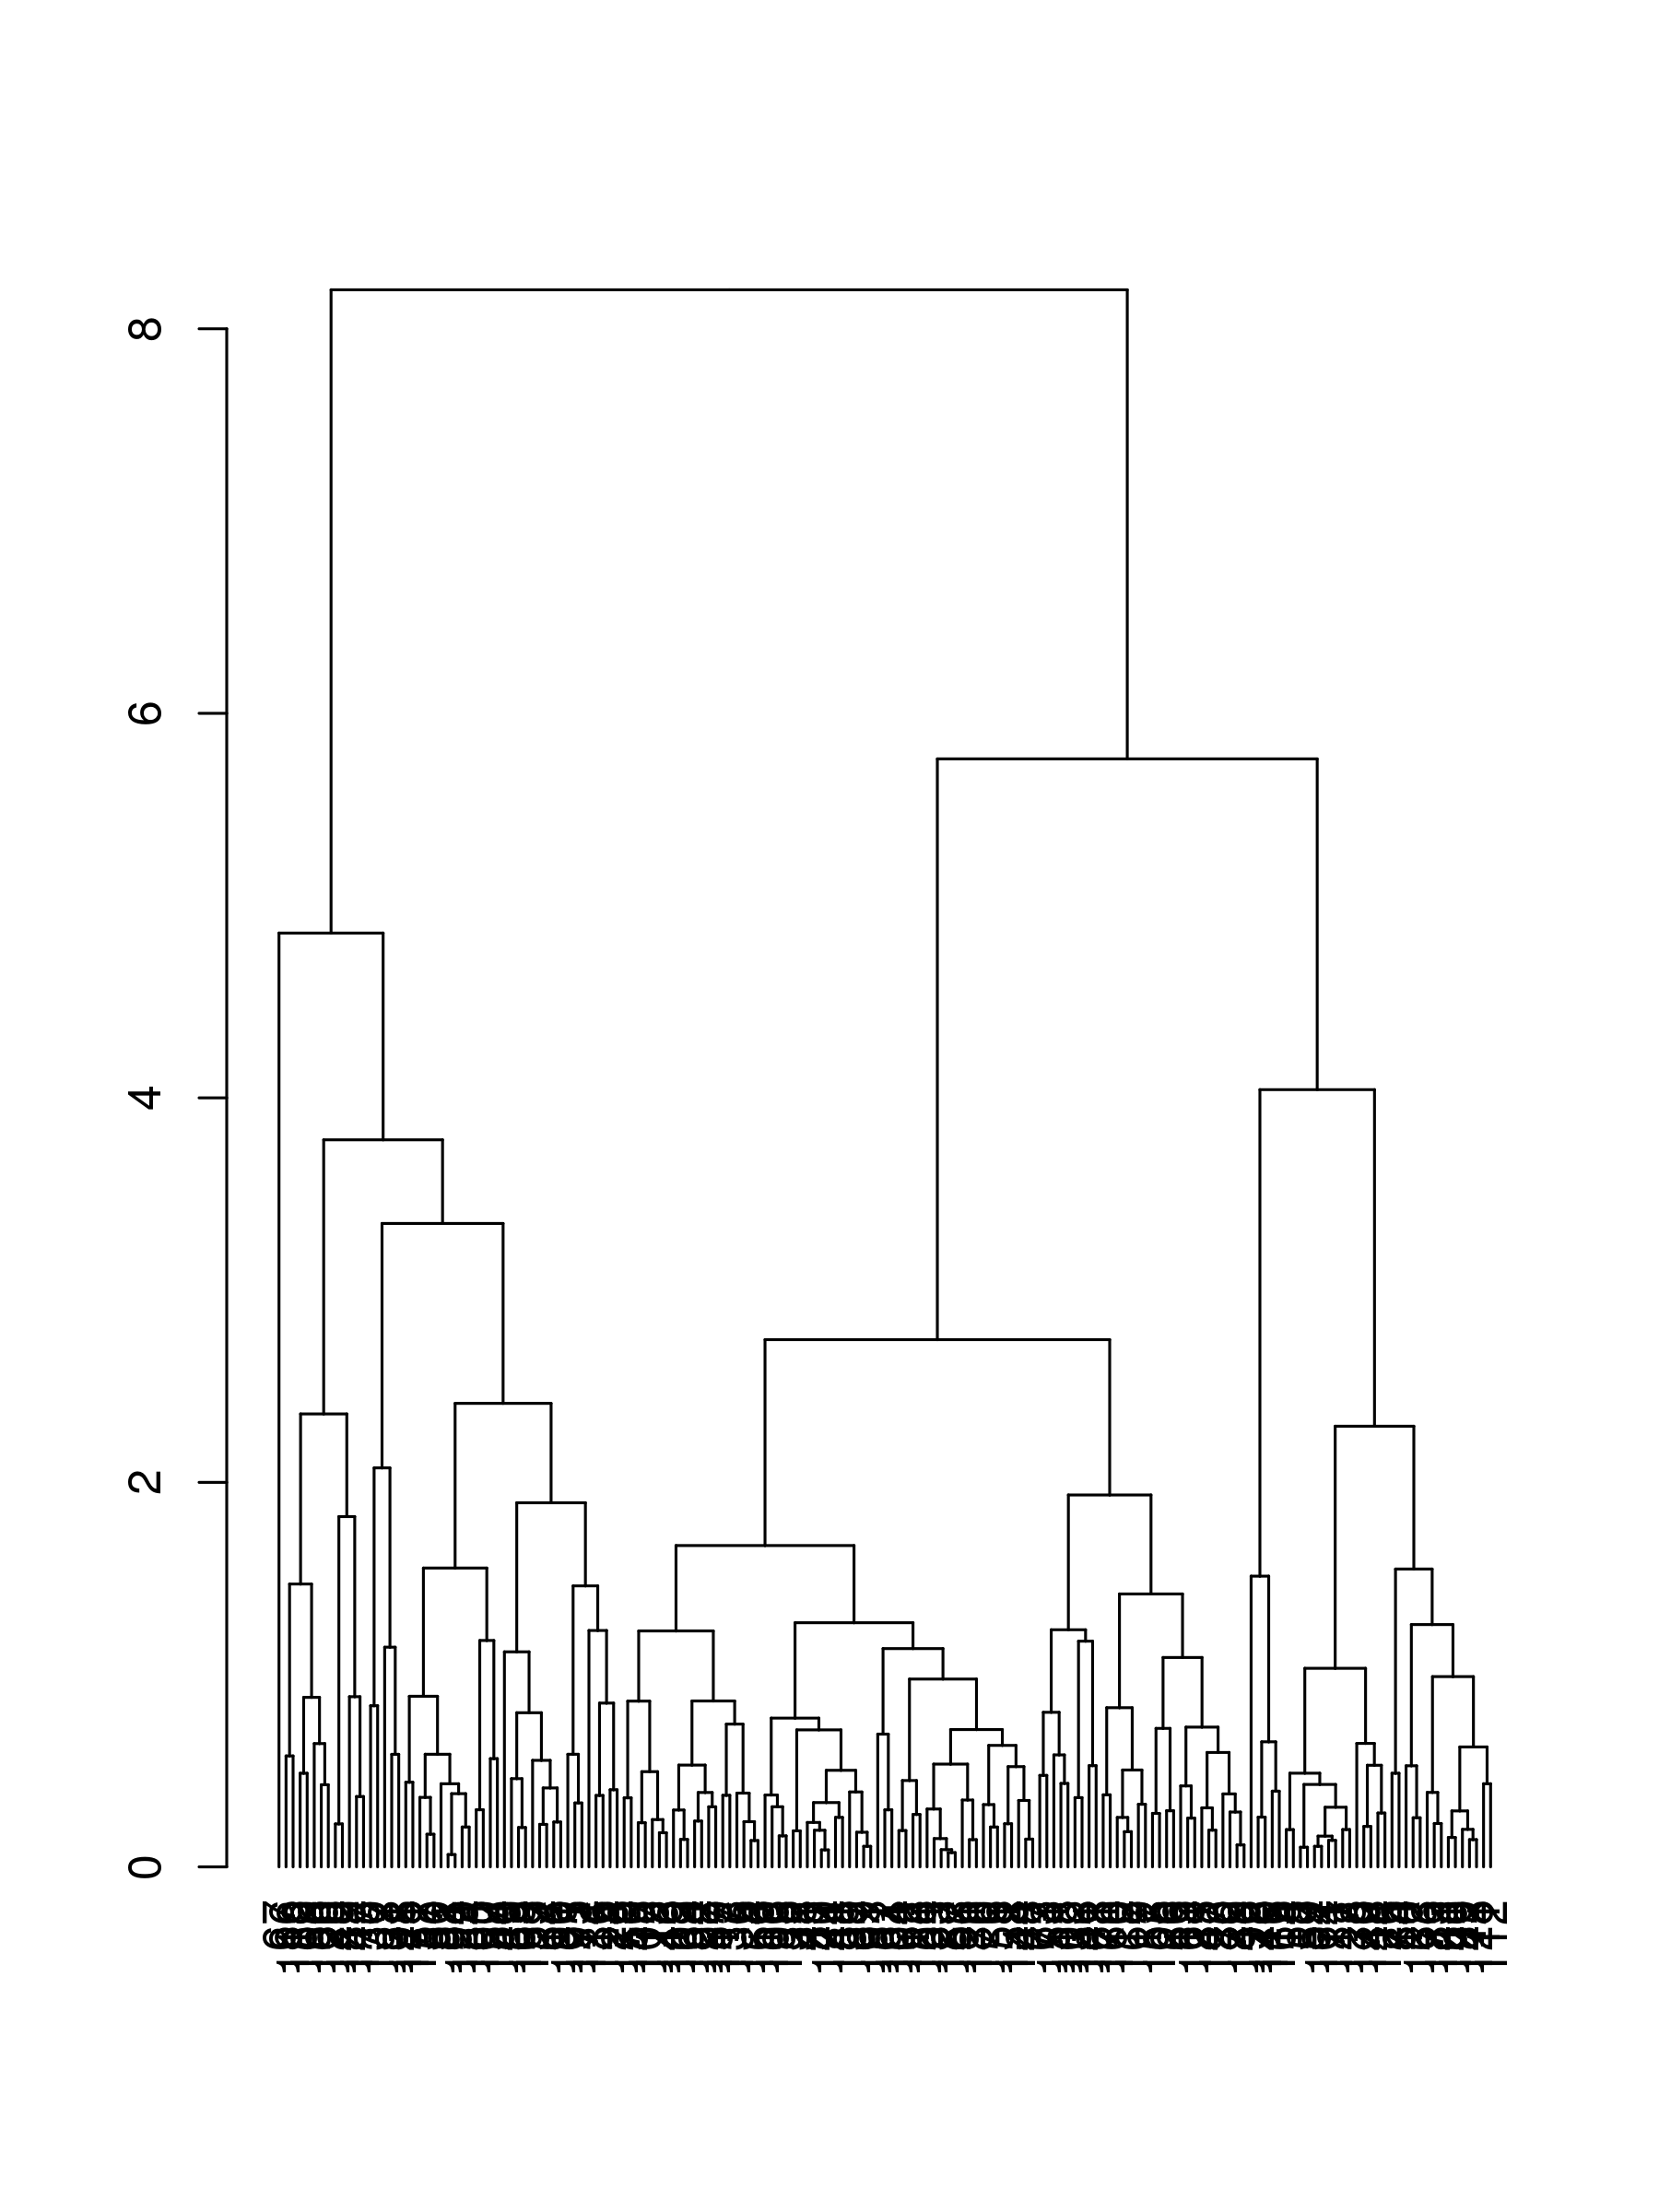

In [86]:
plot(hcd)

In [87]:
library(dendextend)

In [88]:
labels(hcd)<- df_2010_st$country[labels(hcd)]

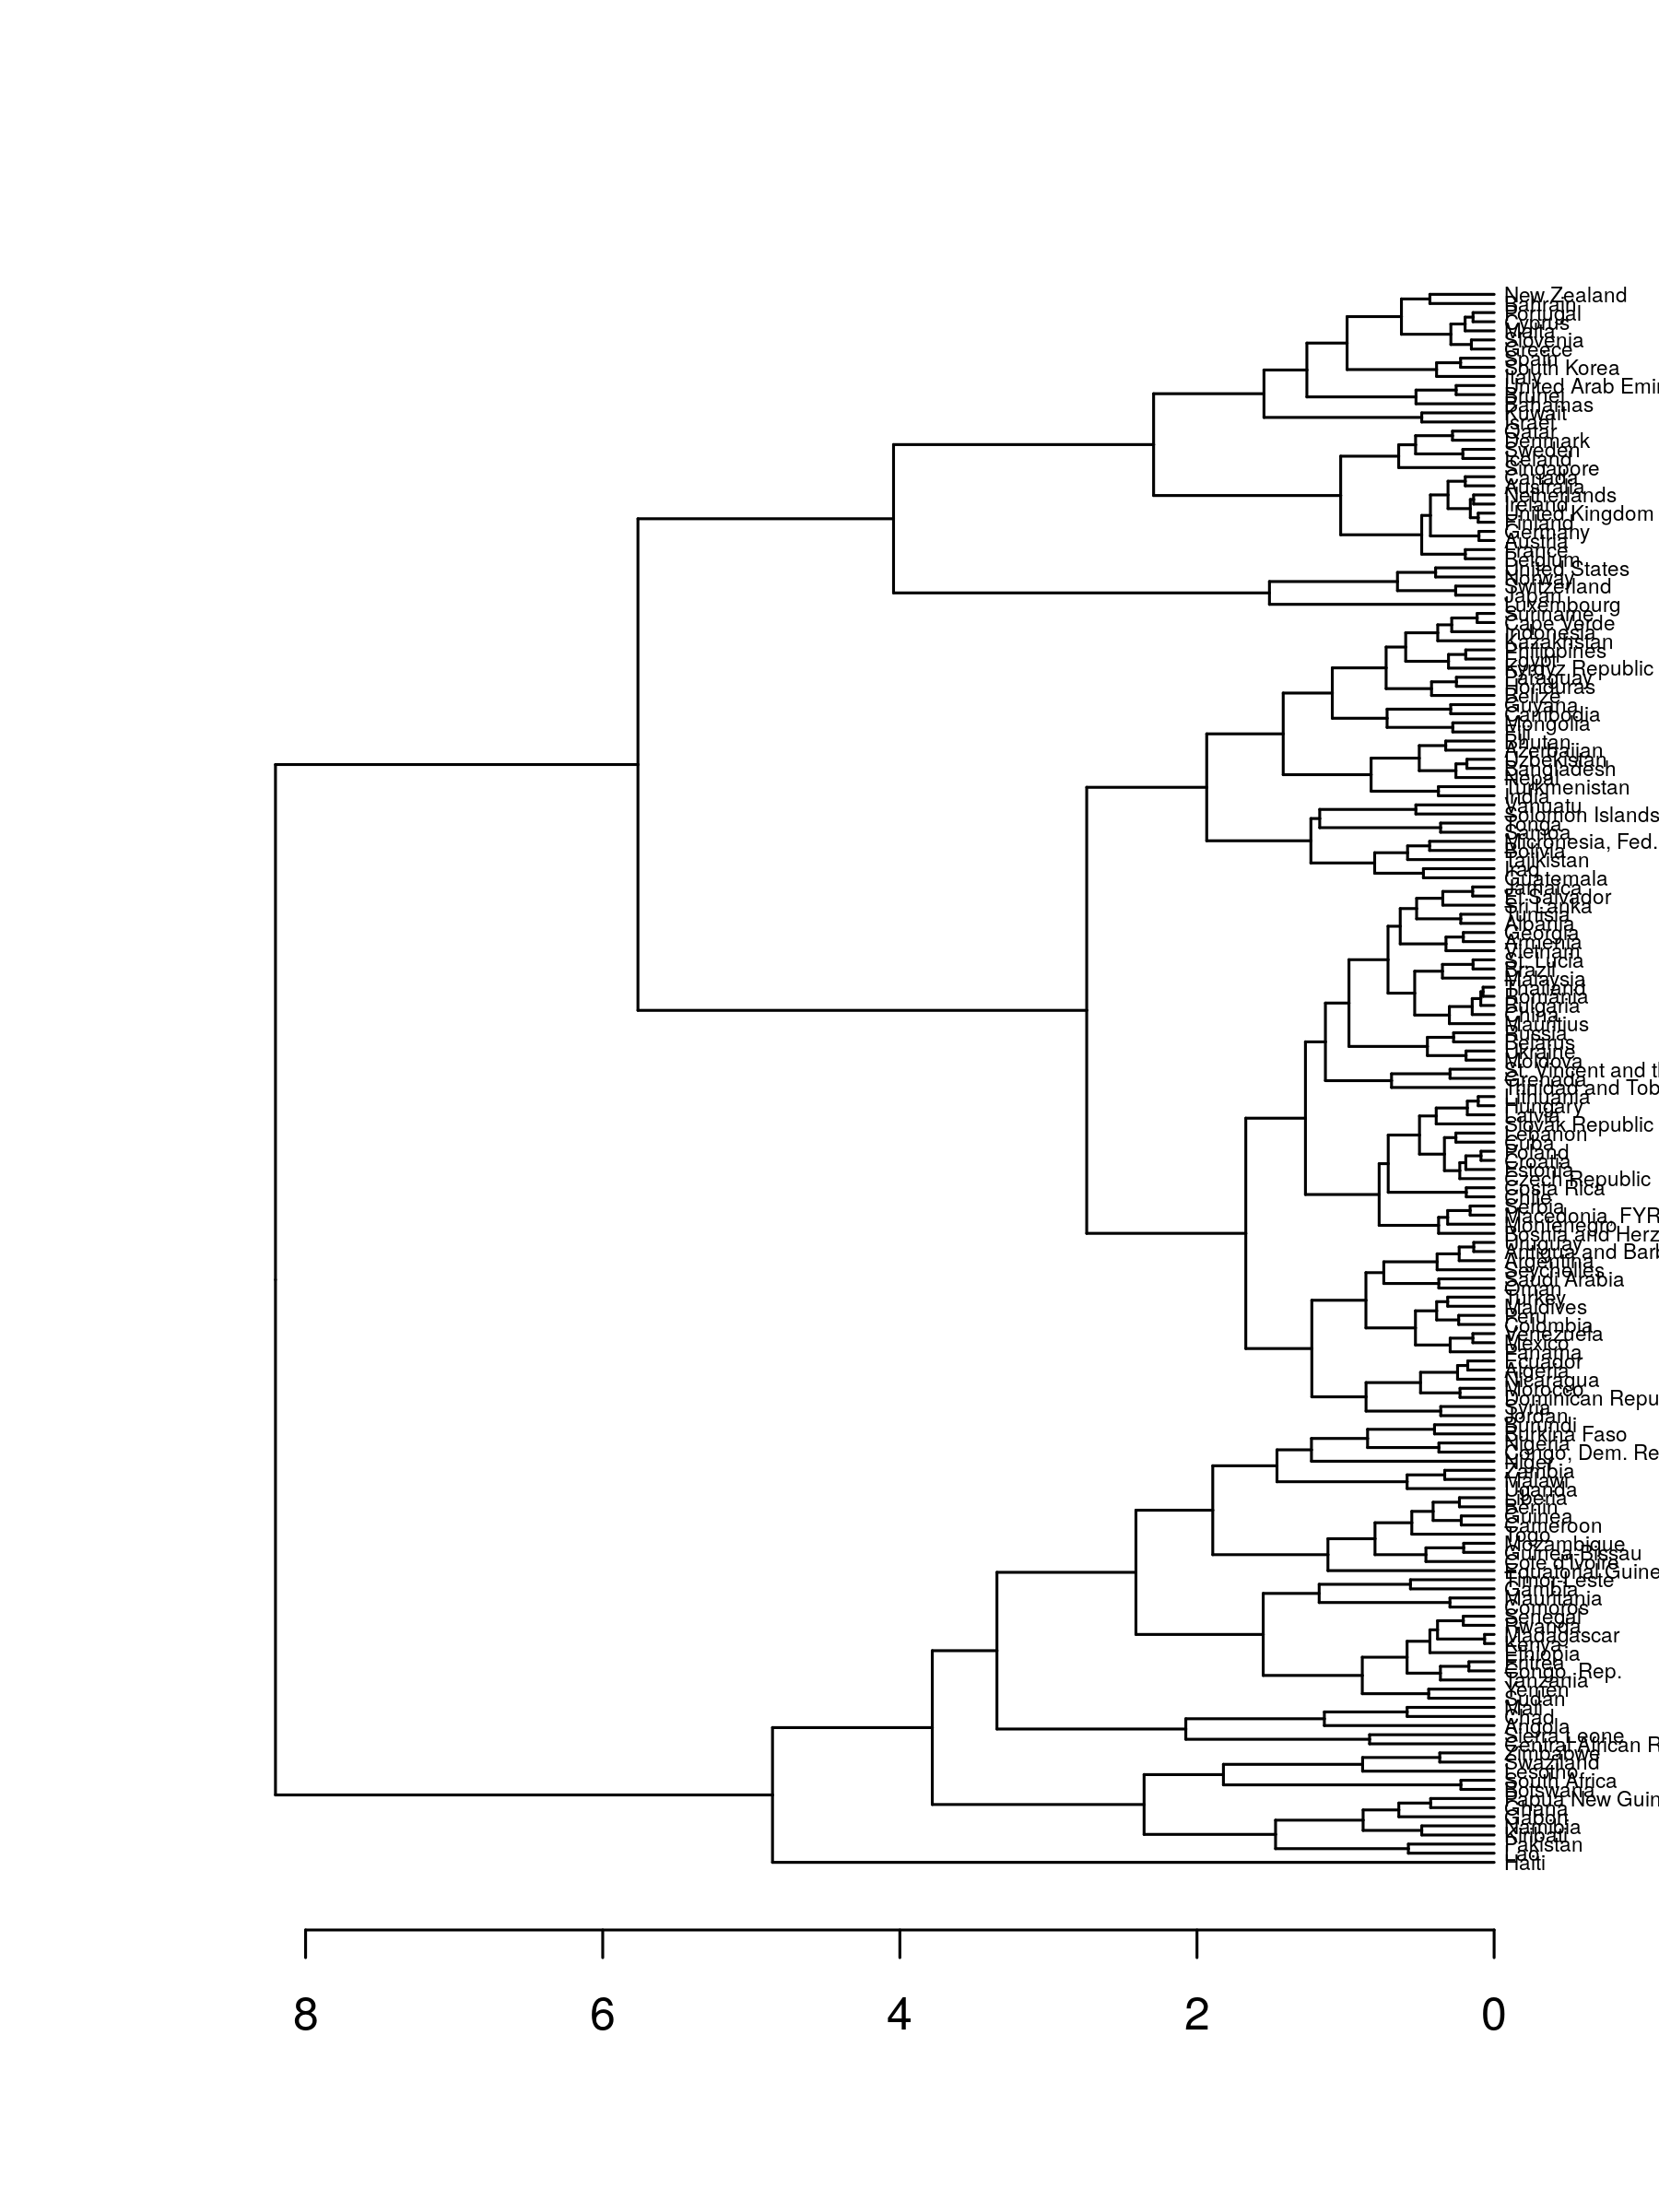

In [91]:
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)

hcd<-set(hcd,"labels_cex", 0.45) 
plot(hcd, horiz=TRUE, cex=0.1)

In [92]:
cutree_1h.dendrogram(hcd, h=4)

Albania                        Algeria 
                             3                              3 
                        Angola            Antigua and Barbuda 
                             4                              3 
                     Argentina                        Armenia 
                             3                              3 
                     Australia                        Austria 
                             1                              1 
                    Azerbaijan                        Bahamas 
                             3                              1 
                       Bahrain                     Bangladesh 
                             1                              3 
                       Belarus                        Belgium 
                             3                              1 
                        Belize                          Benin 
                             3                              4 
                        Bhutan                        Bolivia 
                             3                              3 
        Bosnia and Herzegovina                       Botswana 
                             3                              4 
                        Brazil                         Brunei 
                             3                              1 
                      Bulgaria                   Burkina Faso 
                             3                              4 
                       Burundi                       Cambodia 
                             4                              3 
                      Cameroon                         Canada 
                             4                              1 
                    Cape Verde       Central African Republic 
                             3                              4 
                          Chad                          Chile 
                             4                              3 
                         China                       Colombia 
                             3                              3 
                       Comoros               Congo, Dem. Rep. 
                             4                              4 
                   Congo, Rep.                     Costa Rica 
                             4                              3 
                 Cote d'Ivoire                        Croatia 
                             4                              3 
                          Cuba                         Cyprus 
                             3                              1 
                Czech Republic                        Denmark 
                             3                              1 
            Dominican Republic                        Ecuador 
                             3                              3 
                         Egypt                    El Salvador 
                             3                              3 
             Equatorial Guinea                        Eritrea 
                             4                              4 
                       Estonia                       Ethiopia 
                             3                              4 
                          Fiji                        Finland 
                             3                              1 
                        France                          Gabon 
                             1                              4 
                        Gambia                        Georgia 
                             4                              3 
                       Germany                          Ghana 
                             1                              4 
                        Greece                        Grenada 
                             1                              3 
                     Guatemala                         Guinea 
                             3                        

In [96]:
df_2010$cl <- as.factor(cutree_1h.dendrogram(hcd, h=4))

In [97]:
df_2010 %>% filter(cl==1) %>% summary()

      country   infant_mortality life_expectancy   fertility    
 Australia: 1   Min.   : 1.900   Min.   :72.70   Min.   :1.260  
 Austria  : 1   1st Qu.: 3.325   1st Qu.:79.60   1st Qu.:1.465  
 Bahamas  : 1   Median : 3.650   Median :80.45   Median :1.870  
 Bahrain  : 1   Mean   : 4.523   Mean   :80.09   Mean   :1.803  
 Belgium  : 1   3rd Qu.: 5.050   3rd Qu.:81.30   3rd Qu.:1.998  
 Brunei   : 1   Max.   :11.400   Max.   :82.80   Max.   :2.920  
 (Other)  :24                                                   
   population            gdp               continent 
 Min.   :  318042   Min.   :4.602e+09   Africa  : 0  
 1st Qu.: 2304228   1st Qu.:5.850e+10   Americas: 2  
 Median : 7874910   Median :1.621e+11   Asia    : 9  
 Mean   :17874679   Mean   :4.035e+11   Europe  :17  
 3rd Qu.:20780040   3rd Qu.:5.326e+11   Oceania : 2  
 Max.   :80435307   Max.   :2.069e+12                
                                                     
                       region      gdp_pc      c

In [98]:
df_2010 %>% filter(cl==2) %>% summary()

          country  infant_mortality life_expectancy   fertility    
 Japan        :1   Min.   :1.90     Min.   :78.80   Min.   :1.370  
 Luxembourg   :1   1st Qu.:2.40     1st Qu.:81.10   1st Qu.:1.500  
 Norway       :1   Median :2.60     Median :81.30   Median :1.640  
 Switzerland  :1   Mean   :3.42     Mean   :81.24   Mean   :1.678  
 United States:1   3rd Qu.:3.90     3rd Qu.:82.30   3rd Qu.:1.930  
 Albania      :0   Max.   :6.30     Max.   :82.70   Max.   :1.950  
 (Other)      :0                                                   
   population             gdp               continent
 Min.   :   507889   Min.   :2.652e+10   Africa  :0  
 1st Qu.:  4891251   1st Qu.:1.954e+11   Americas:1  
 Median :  7830534   Median :2.947e+11   Asia    :1  
 Mean   : 90085129   Mean   :3.432e+12   Europe  :3  
 3rd Qu.:127319802   3rd Qu.:5.094e+12   Oceania :0  
 Max.   :309876170   Max.   :1.155e+13               
                                                     
                       r